In [27]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import Holt
import matplotlib.pyplot as plt

In [28]:
df = pd.read_excel('T0201.xlsx')
df = df[['Date', 'Bank_Issues']]
df.set_index('Date', inplace=True)
df.head()

,Bank_Issues
Date,
1968-12-31,1983.67
1969-01-31,1984.86
1969-02-28,2090.50
1969-03-31,2000.76
1969-04-30,2007.87


*Decompose the time series into trend, seasonality, and residuals. Please present the result 
as a four-panel chart starting with the observed data followed by the three components.*

In [29]:
result = sm.tsa.seasonal_decompose(df['Bank_Issues'], model='additive')

# Access the components:
trend = result.trend
seasonal = result.seasonal
residual = result.resid

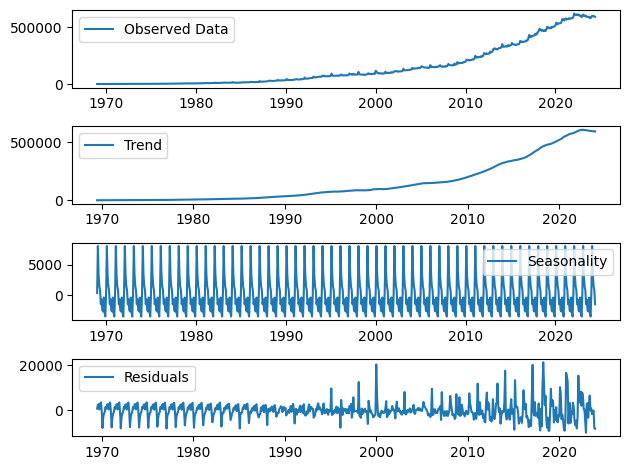

In [30]:
# Plot the observed data
plt.subplot(411)
plt.plot(df.index, df['Bank_Issues'], label='Observed Data')
plt.legend()

# Plot the trend component
plt.subplot(412)
plt.plot(df.index, trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonality')
plt.legend()

# Plot the residual component
plt.subplot(414)
plt.plot(df.index, residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

*Forecast currency in circulation 12 months ahead with a (seasonal) naïve model, an 
exponential smoothing model and an ARIMA/SARIMA model.*

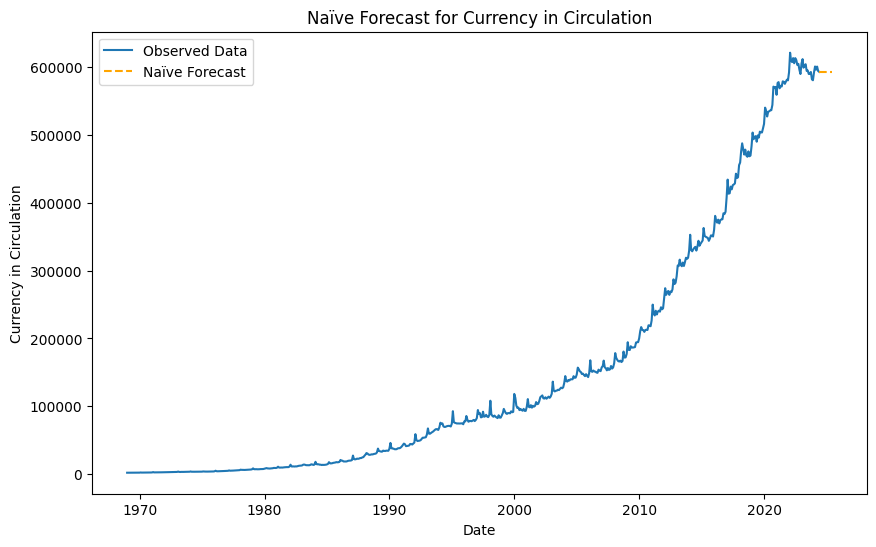

In [31]:
# Create a new DataFrame for the forecast
forecast_df = pd.DataFrame(index=pd.date_range(start=df.index[-1], periods=13, freq='ME'))

# Set the forecast values to the last observed value
forecast_df['Forecast'] = df['Bank_Issues'].iloc[-1]

# Plot the observed data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Bank_Issues'], label='Observed Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Naïve Forecast', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Currency in Circulation')
plt.title('Naïve Forecast for Currency in Circulation')
plt.legend()
plt.show()

C:\WPy64-31241\python-3.12.4.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


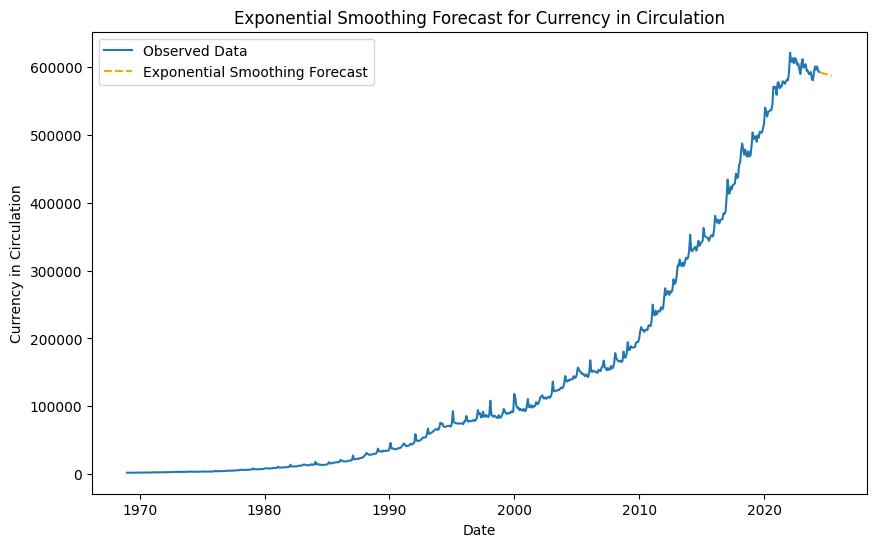

In [32]:
# Train the model
model = Holt(df, exponential=False, initialization_method="estimated").fit(
    smoothing_level=0.2, smoothing_trend=0.1, damping_trend=0.2)

# Forecast for the next 12 months
forecast = model.forecast(steps=12)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Bank_Issues'], label='Observed Data')
plt.plot(forecast.index, forecast, label='Exponential Smoothing Forecast', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Currency in Circulation')
plt.title('Exponential Smoothing Forecast for Currency in Circulation')
plt.legend()
plt.show()

In [33]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and preprocess your time series data (assuming you have a DataFrame 'data' with columns 'Date' and 'Bank_Issues')
# Specify the SARIMA order and seasonal order
p, d, q = 1, 1, 1  # ARIMA order
P, D, Q, s = 1, 1, 1, 12  # Seasonal order (monthly data with a yearly seasonality)

model = SARIMAX(df['Bank_Issues'], order=(p, d, q), seasonal_order=(P, D, Q, s))
result = model.fit()

# Forecast future values
forecast_steps = 12  # Example: forecast next 12 months
forecast = result.get_forecast(steps=forecast_steps)

# Access forecasted values
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()  # Confidence intervals


C:\WPy64-31241\python-3.12.4.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\WPy64-31241\python-3.12.4.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
